In [1]:
import sys
sys.path.insert(0, "../")
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
from lof.predict import set_cache_start
set_cache_start("20161225")

In [3]:
from lof.predict import estimate_table , analyse_all, get_daily, Compare
from lof.holdings import holdings

这一笔记，我们讨论一下相关基金对标的的跟踪效果，和基金之间的效果类比。

## 建信富时100

In [5]:
fs = Compare("F539003", "27", start="20200201") ## 这莫非是还没建完仓？

<IPython.core.display.Javascript object>


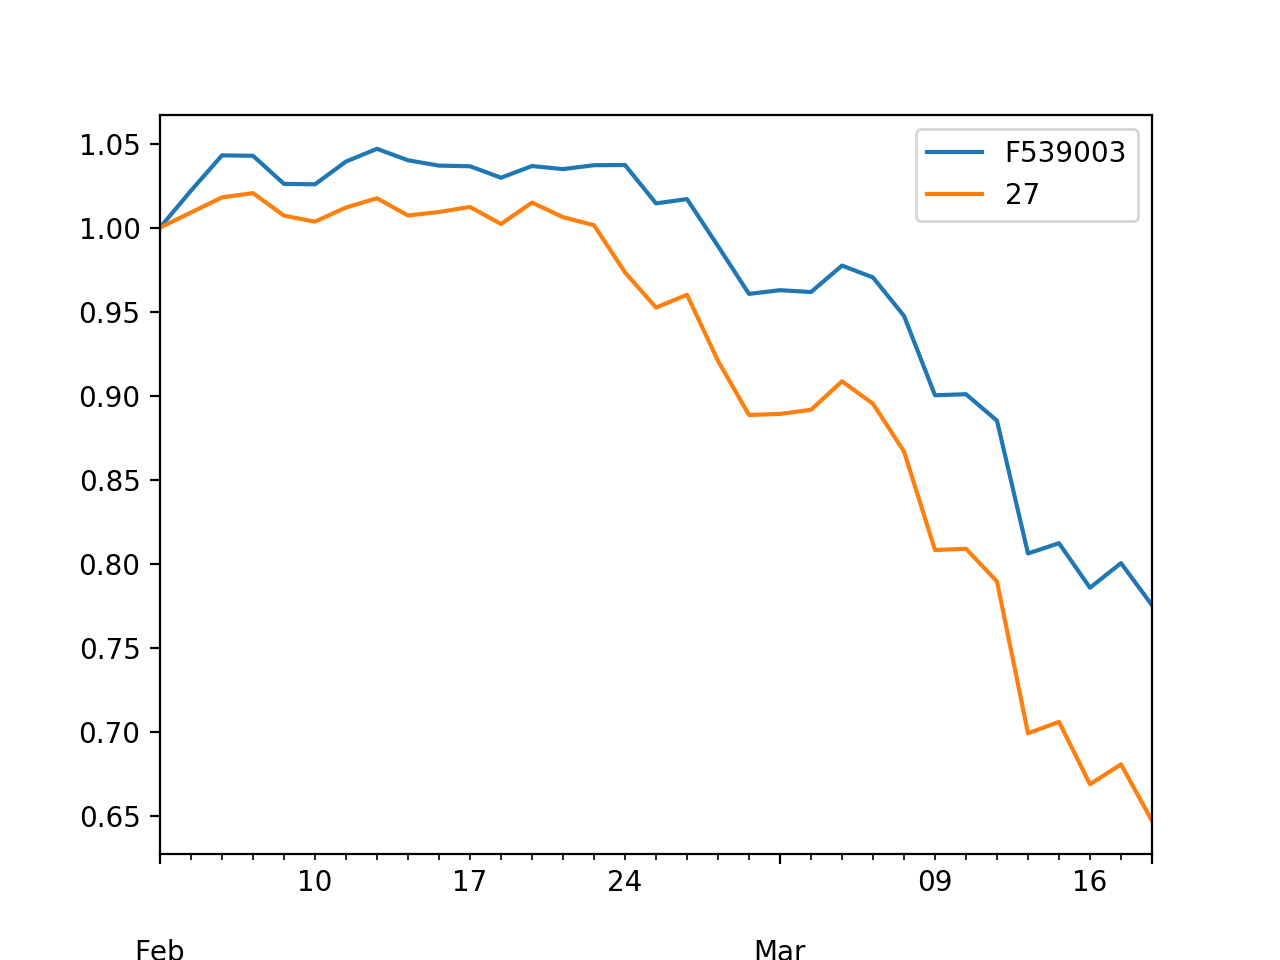

In [6]:
fs.v()

In [7]:
fs.corr()

,F539003,27
F539003,1.000000,0.963593
27,0.963593,1.000000


## 白银

<IPython.core.display.Javascript object>


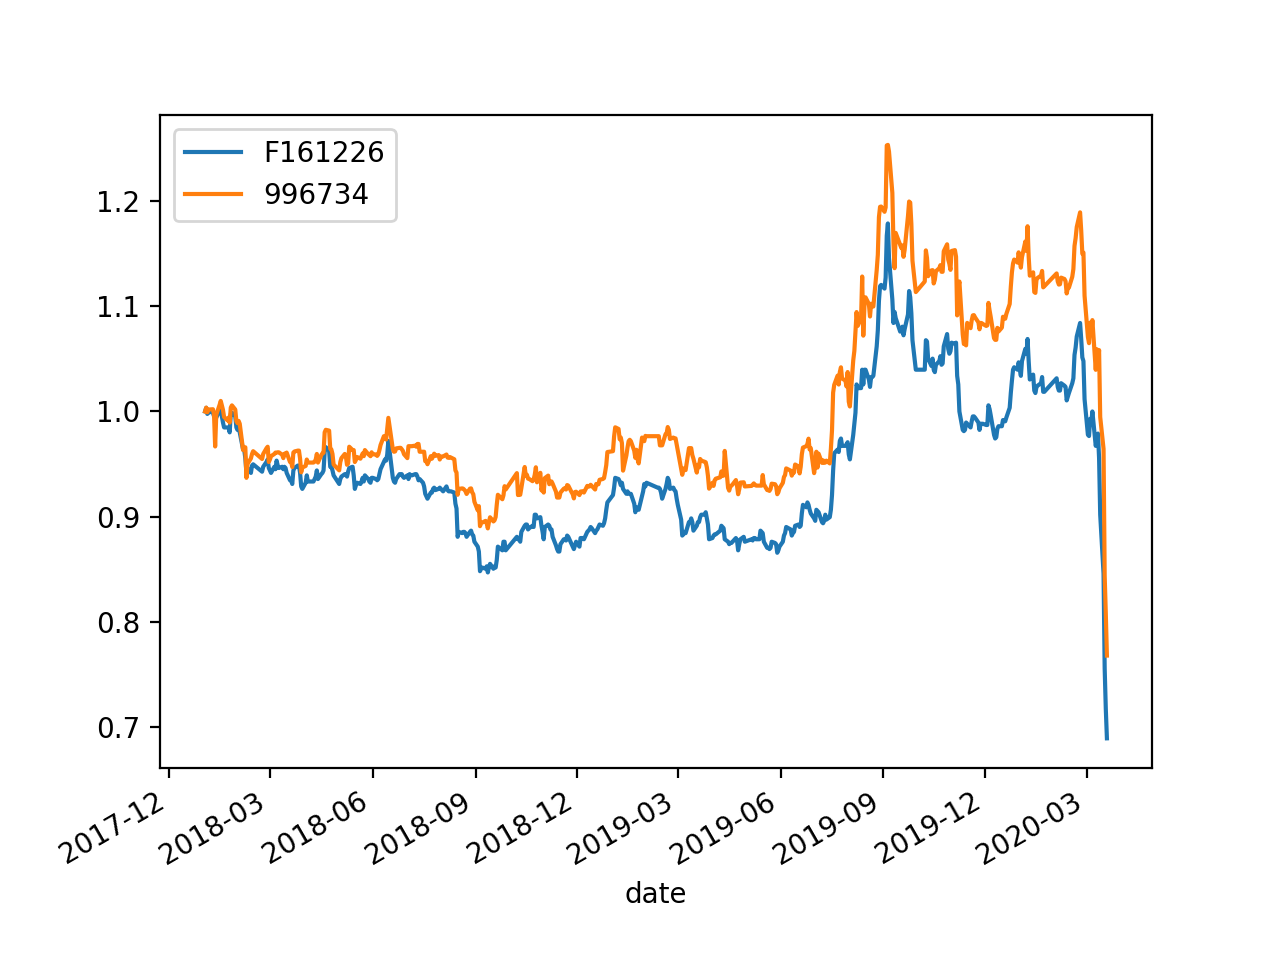

In [8]:
silver = Compare("F161226", "996734", start="20180101") 
# 直接持仓上海白银期货合约，不过占仓位70%的债券是认真的？真的不是别的基金季报复制错了？
silver.v()

In [9]:
silver.corr()

,F161226,996734
F161226,1.000000,0.826143
996734,0.826143,1.000000


## 原油类

<IPython.core.display.Javascript object>


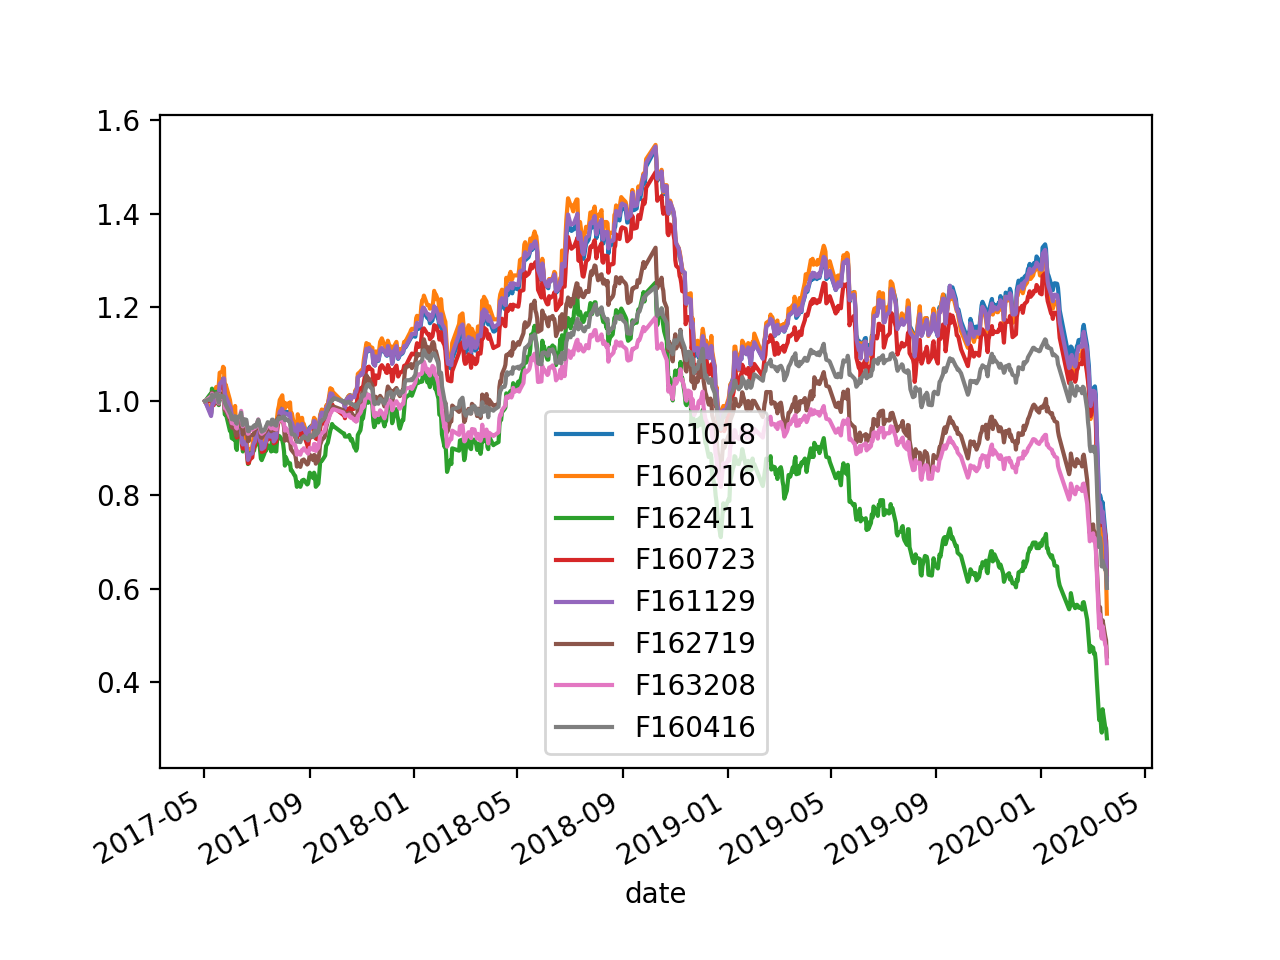

In [10]:
oils = Compare("F501018",
        "F160216",
        "F162411",
        "F160723",
        "F161129",
        "F162719",
        "F163208",
        "F160416",
        start="20170501", )

# 华宝油气的绿线，真的啧啧啧，真点和油价相关
# 最好的似乎是国泰，南方和易方达，高度一致，嘉实原油跟踪的略差一点
# 华安标普是持仓股票的里边，表现最好的
# 广发道琼斯略好于诺安油气，二者属于一类，但和油价关系较弱

# 这样看担心期货升水损耗的话，最好的持有标的是华安标普全球石油，其还开放申购
oils.v()

In [11]:
oils.corr()

,F501018,F160216,F162411,F160723,F161129,F162719,F163208,F160416
F501018,1.000000,0.959119,0.729243,0.987374,0.991448,0.742979,0.784279,0.798713
F160216,0.959119,1.000000,0.750461,0.954486,0.969758,0.754426,0.797633,0.783716
F162411,0.729243,0.750461,1.000000,0.728082,0.740024,0.963199,0.941908,0.867659
F160723,0.987374,0.954486,0.728082,1.000000,0.981059,0.742708,0.785055,0.804148
F161129,0.991448,0.969758,0.740024,0.981059,1.000000,0.752654,0.797320,0.807634
F162719,0.742979,0.754426,0.963199,0.742708,0.752654,1.000000,0.968272,0.917284
F163208,0.784279,0.797633,0.941908,0.785055,0.797320,0.968272,1.000000,0.960474
F160416,0.798713,0.783716,0.867659,0.804148,0.807634,0.917284,0.960474,1.000000


<IPython.core.display.Javascript object>


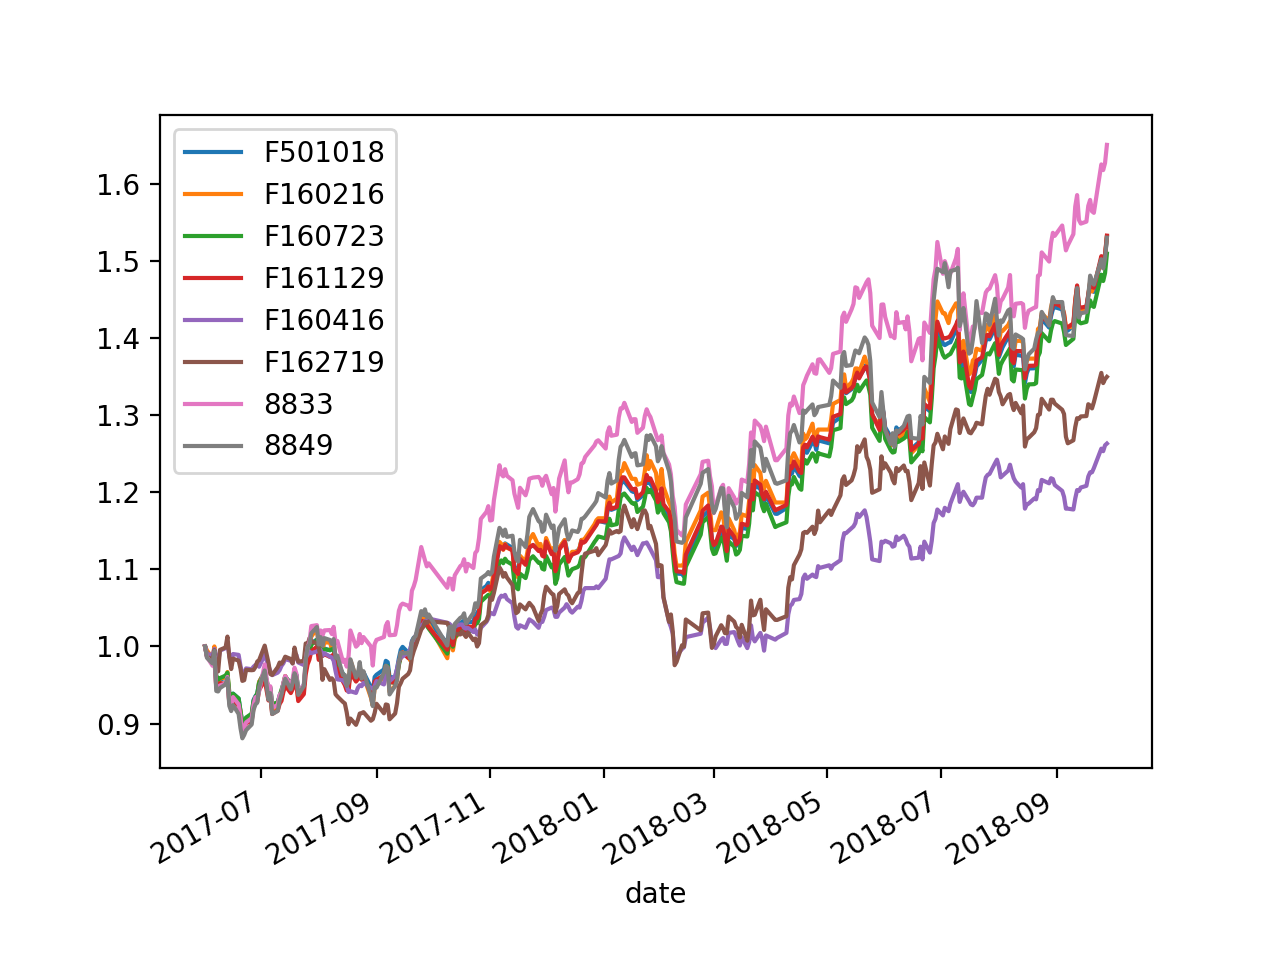

In [27]:
oilbc = Compare(
    "F501018",
    "F160216",
    "F160723",
    "F161129",
    "F160416",
    "F162719",
    "8833",
    "8849",
    start="20170601",
    end="20181001",
)
oilbc.v()
## 上涨阶段跟踪能力都不行，升水严重，国泰商品和易方达原油似乎是最靠谱的标的

关于原油相关的国内基金的结论：
* 紧密跟踪油价，底层持仓原油期货这类基金，效果最好的是**国泰商品**和**易方达原油**，南方原油也可以，嘉实原油稍差一点
* 打算通过持仓股票防止升水损耗，又想和油价相关性高的话，无脑选**华安标普原油**，持仓公司大牌质地好，和油价关系更紧密，表现也是全部持股票基金中最好的，甚至一支独秀。至于华宝油气。。。开心就好

<IPython.core.display.Javascript object>


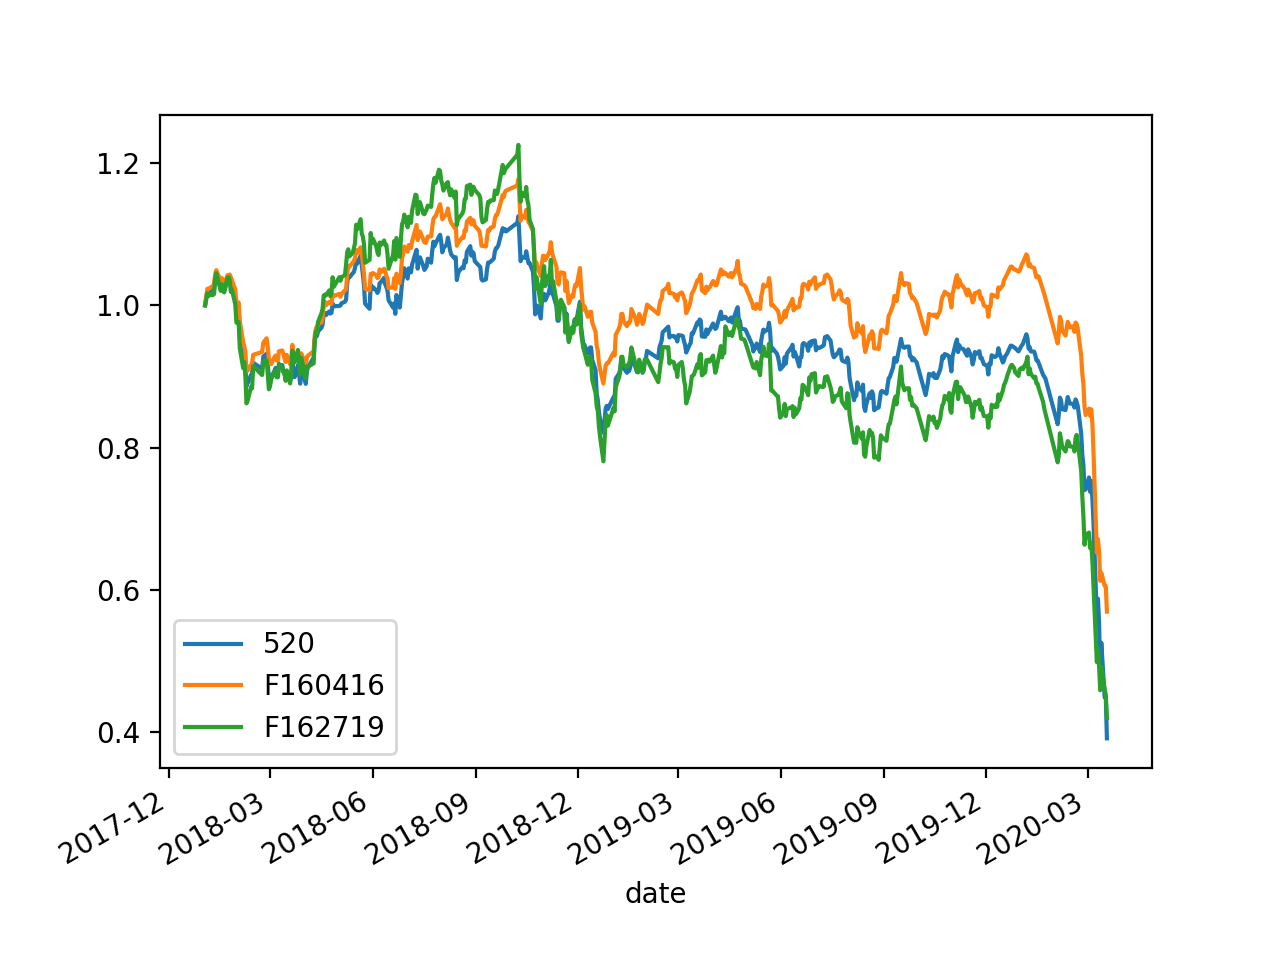

In [8]:
goi = Compare("520", "F160416","F162719", start="20180101")
goi.v() ## 感觉反倒 162719 和 IXC 更像

In [7]:
goi.corr() # 这样看日线级别，520 还是更能预测160416

,520,F160416,F162719
520,1.000000,0.913426,0.888247
F160416,0.913426,1.000000,0.917054
F162719,0.888247,0.917054,1.000000


## 德国30

In [13]:
dax = Compare("F513030", "F000614", "172", "8826")

<IPython.core.display.Javascript object>


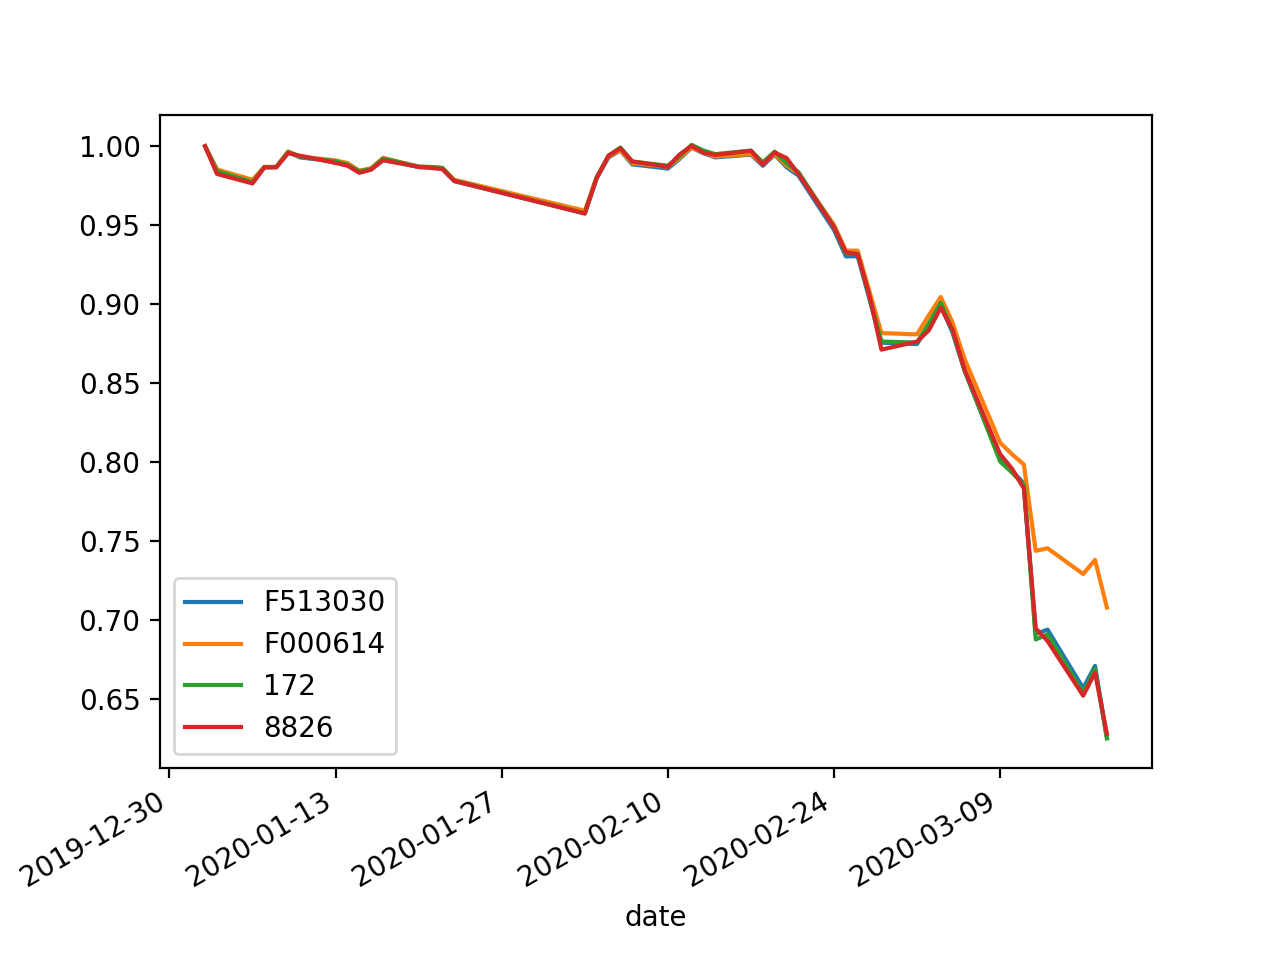

In [14]:
dax.v()
## 最近 dax30 场外链接背离了场内，下跌变慢，估计是加仓太多造成的？这背离的也太猛了
## 也就是说虽然场内溢价，但我们还是应该买场内？跌得也差太多了吧

In [19]:
dax.corr() # 联接跟踪etf，才0.95，难道这数是从仓位来的？

,F513030,F000614,172,8826
F513030,1.000000,0.957875,0.999592,0.989143
F000614,0.957875,1.000000,0.958309,0.957244
172,0.999592,0.958309,1.000000,0.989797
8826,0.989143,0.957244,0.989797,1.000000


## 纳斯达克100

<IPython.core.display.Javascript object>


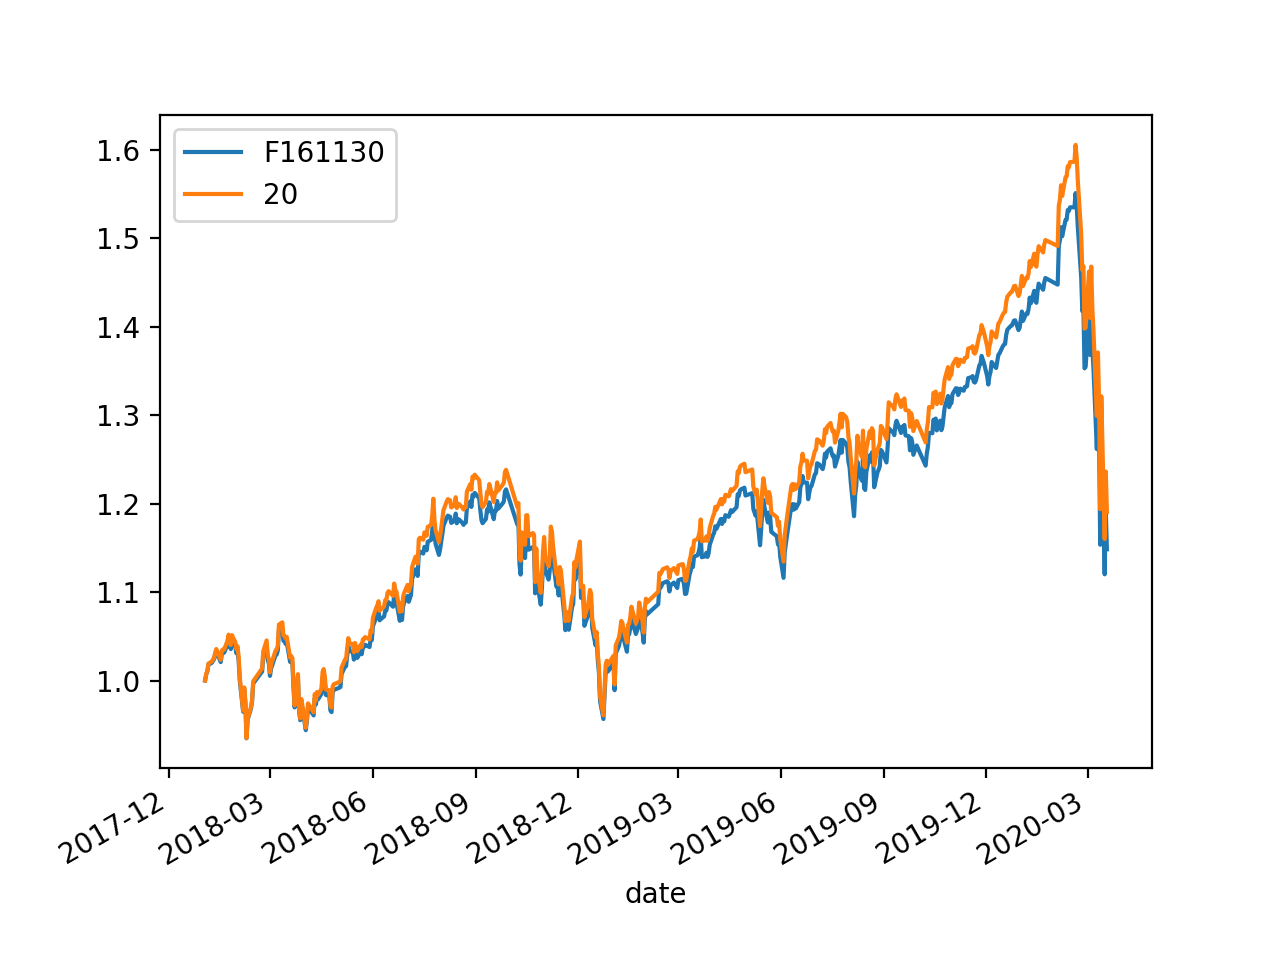

In [21]:
nasdaq = Compare("F161130", "20", start="20180101")
nasdaq.v()

In [22]:
nasdaq.corr() ## 这效果，我很满意，跟踪的忒给力

,F161130,20
F161130,1.000000,0.999423
20,0.999423,1.000000


## 标普500

<IPython.core.display.Javascript object>


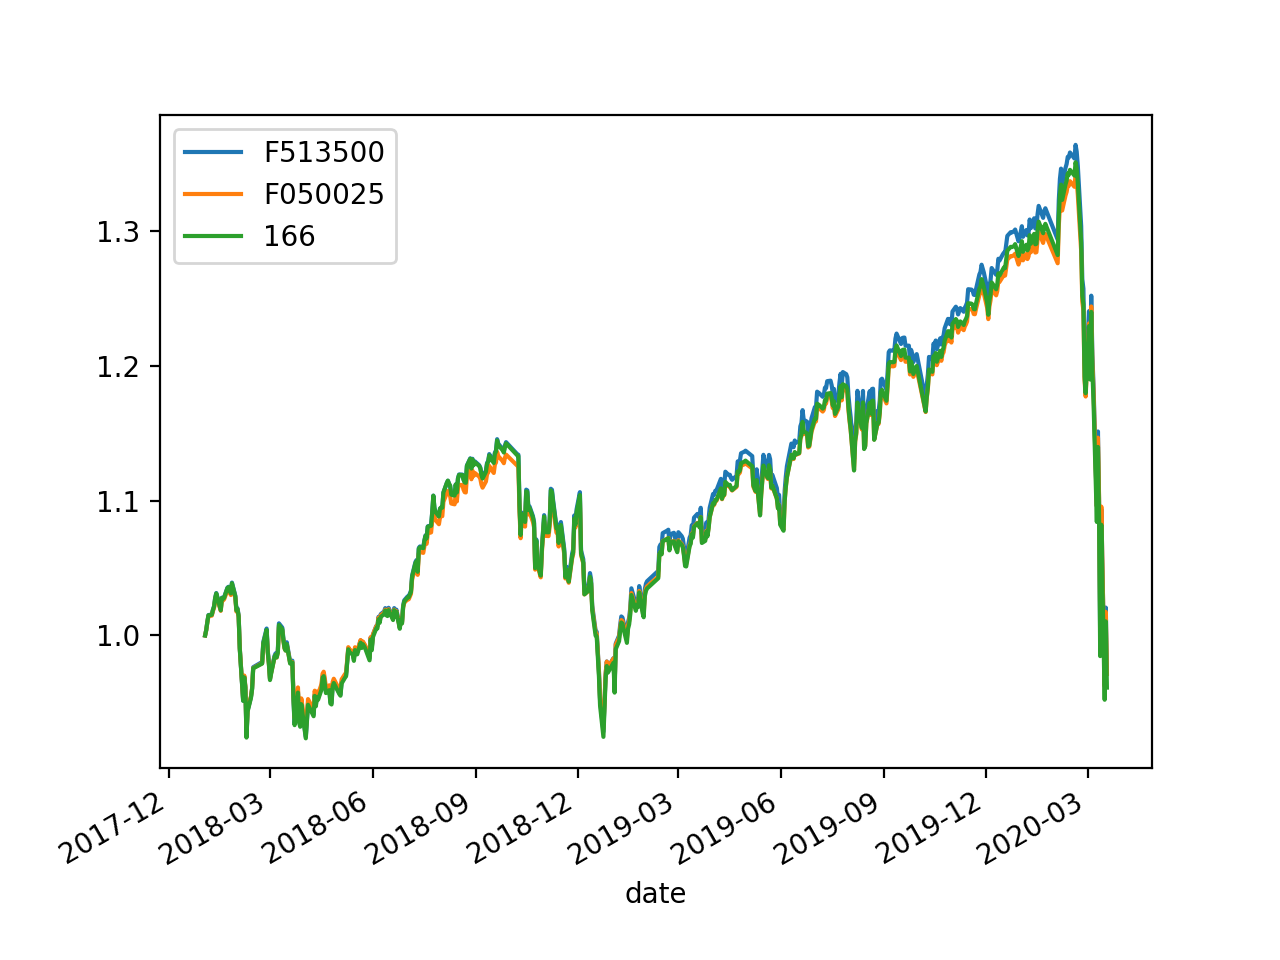

In [23]:
sp = Compare("F513500", "F050025", "166", start="20180101")
sp.v()

In [24]:
sp.corr() ## 效果是真强。。。。怎么做到跟踪美股指数能这么好的，一部分精细计算的杠杆仓位给货币仓位做对冲？

,F513500,F050025,166
F513500,1.000000,0.998668,0.999934
F050025,0.998668,1.000000,0.998716
166,0.999934,0.998716,1.000000


## 恒生

/Users/shixin/Documents/newwork/quant finance/xalpha/xalpha/universal.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = df[k].apply(_float)


<IPython.core.display.Javascript object>


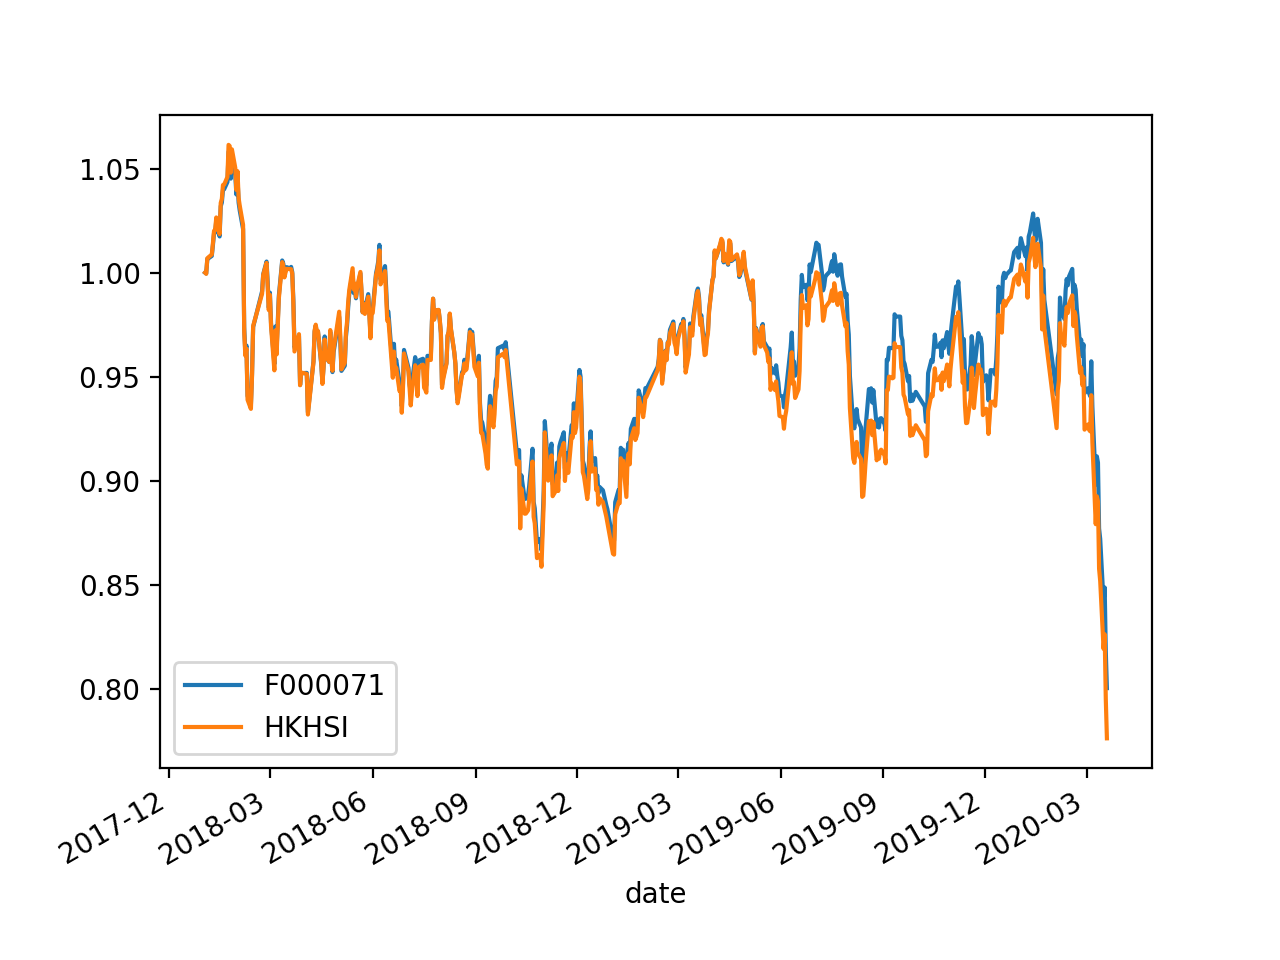

In [4]:
hs = Compare("F000071", ("HKHSI", "HKD"), start="20180101")
hs.v()

In [5]:
hs.corr()

,F000071,HKHSI
F000071,1.000000,0.998806
HKHSI,0.998806,1.000000


## 海外互联

In [16]:
intn = Compare("F164906", "F513050", ("KWEB", "USD"), "CSIH11136", start="20190101")

<IPython.core.display.Javascript object>


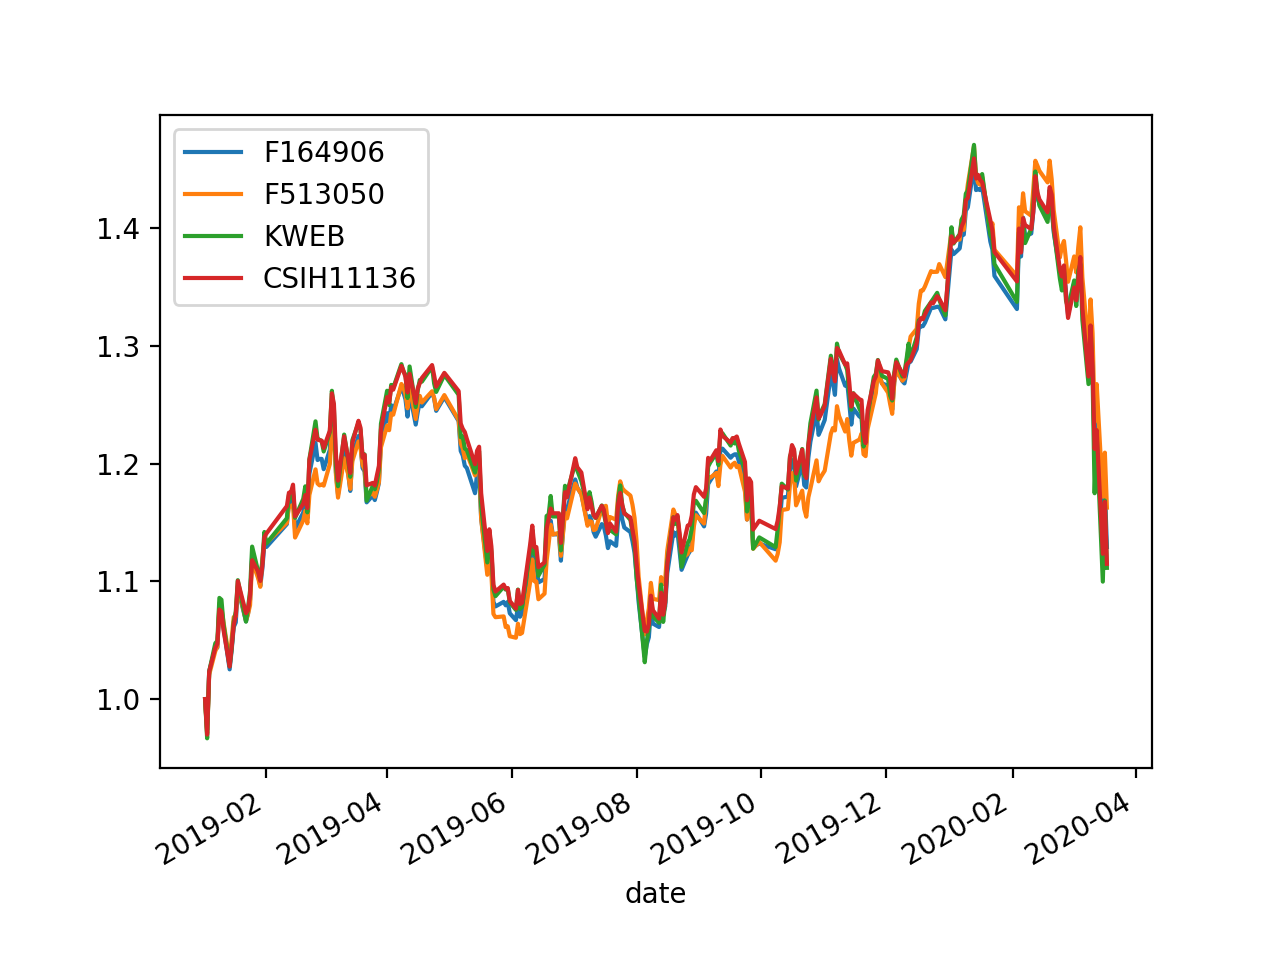

In [17]:
intn.v()

In [18]:
intn.corr() # KWEB 还没中国互联像中概互联, 不过这四个纯粹一家子，没啥区别，反倒最不像的是 KWEB 和中概互联
# 所以用 KWEB 来预测中概互联，还不如直接用中国互联指数

,F164906,F513050,KWEB,CSIH11136
F164906,1.000000,0.975688,0.978188,0.983721
F513050,0.975688,1.000000,0.948507,0.955970
KWEB,0.978188,0.948507,1.000000,0.969292
CSIH11136,0.983721,0.955970,0.969292,1.000000
